In [1]:
import numpy as np
from astropy.io import fits
from astropy.table import Table as Table
import matplotlib.pyplot as plt
from linetools.spectra import utils as ltsu
from linetools.spectra.xspectrum1d import XSpectrum1D
import astropy.units as u
from array import array
from astropy import constants as const

In [2]:
#to order and match the spec with their z values
spec_atr = Table.read('/home/jsm/PycharmProjects/Summer_Research_2018/old_spec/spec_atr.txt', format = 'ascii') 

#an initial filter to ensure the spec included cover lya
basestring = '/home/jsm/PycharmProjects/Summer_Research_2018/old_spec/'

init_spec = []

init_z = []
    
for entry in spec_atr:
    
    if 2.00 < entry["zspec"] < 2.9: 
        
        temp = XSpectrum1D.from_file(basestring + entry["Filename"])
        
        if temp.wvmin < (1216*u.AA)*(1+entry["zspec"]) < temp.wvmax:
                
            init_z.append(entry["zspec"])
                
            init_spec.append(XSpectrum1D.from_file(basestring + entry["Filename"]))

In [7]:
init_spec = np.asarray(init_spec)

print(init_spec)

init_z = np.asarray(init_z)

len(init_spec)

[ <XSpectrum1D: file=/home/jsm/PycharmProjects/Summer_Research_2018/old_spec/cl2016comb_zsp2.3_00871_F.fits, nspec=1, select=0, wvmin=3771.6 Angstrom, wvmax=5656.93 Angstrom>
 <XSpectrum1D: file=/home/jsm/PycharmProjects/Summer_Research_2018/old_spec/cl2016comb_zsp2.6_00923_F.fits, nspec=1, select=0, wvmin=3432.28 Angstrom, wvmax=5657.32 Angstrom>
 <XSpectrum1D: file=/home/jsm/PycharmProjects/Summer_Research_2018/old_spec/cl2016comb_zsp2.5_00941_F.fits, nspec=1, select=0, wvmin=3077.77 Angstrom, wvmax=5574.95 Angstrom>
 <XSpectrum1D: file=/home/jsm/PycharmProjects/Summer_Research_2018/old_spec/cl2016comb_zsp2.7_00954_F.fits, nspec=1, select=0, wvmin=3077.85 Angstrom, wvmax=5321.44 Angstrom>
 <XSpectrum1D: file=/home/jsm/PycharmProjects/Summer_Research_2018/old_spec/cl2016comb_zsp2.6_00966_F.fits, nspec=1, select=0, wvmin=3078.44 Angstrom, wvmax=5393.7 Angstrom>
 <XSpectrum1D: file=/home/jsm/PycharmProjects/Summer_Research_2018/old_spec/cl2016comb_zsp2.4_01012_F.fits, nspec=1, select=0,

array([ <XSpectrum1D: file=/home/jsm/PycharmProjects/Summer_Research_2018/old_spec/cl2016comb_zsp2.3_00871_F.fits, nspec=1, select=0, wvmin=3771.6 Angstrom, wvmax=5656.93 Angstrom>,
       <XSpectrum1D: file=/home/jsm/PycharmProjects/Summer_Research_2018/old_spec/cl2016comb_zsp2.6_00923_F.fits, nspec=1, select=0, wvmin=3432.28 Angstrom, wvmax=5657.32 Angstrom>,
       <XSpectrum1D: file=/home/jsm/PycharmProjects/Summer_Research_2018/old_spec/cl2016comb_zsp2.5_00941_F.fits, nspec=1, select=0, wvmin=3077.77 Angstrom, wvmax=5574.95 Angstrom>,
       <XSpectrum1D: file=/home/jsm/PycharmProjects/Summer_Research_2018/old_spec/cl2016comb_zsp2.7_00954_F.fits, nspec=1, select=0, wvmin=3077.85 Angstrom, wvmax=5321.44 Angstrom>,
       <XSpectrum1D: file=/home/jsm/PycharmProjects/Summer_Research_2018/old_spec/cl2016comb_zsp2.6_00966_F.fits, nspec=1, select=0, wvmin=3078.44 Angstrom, wvmax=5393.7 Angstrom>,
       <XSpectrum1D: file=/home/jsm/PycharmProjects/Summer_Research_2018/old_spec/cl2016com

In [4]:
wave_range_mask = [(3600*u.AA > spec.wvmin) and (4600*u.AA < spec.wvmax) for spec in init_spec]

speclist = init_spec[wave_range_mask]

print(len(speclist))

z_val = init_z[wave_range_mask]

156


In [5]:
wave = np.linspace(3600,4600)

s2n = []

for i in range(156):
    
    s2n.append ( [XSpectrum1D.get_local_s2n(speclist[i],wavelength*u.AA)[0] for wavelength in wave] )

In [6]:
s2n_mean = []

s2n_med = []

for i in s2n:
    
    s2n_mean.append(np.mean(i))
    
    s2n_med.append(np.median(i))
    
s2n_min = 2.5

In [11]:
#an array to match the spectra with their s2n values
trim = np.asarray([speclist, s2n_mean]).T  


#grabbing only those above the min value
trimmed_spec = trim[trim[:, 1] > s2n_min][:, 0]  


#to match the new list with z values
trimmed_z = z_val[trim[:, 1] > s2n_min]

np.shape(trim)

(156, 2)

In [25]:
len(trimmed_spec)

36

In [26]:
#normalizing the flux
flux_av = [np.median(trimmed_spec[i].flux) for i in range(len(trimmed_spec))]
    
factor_1 = max(flux_av)
    
scale = [(factor_1/(number)) for number in flux_av]    
    
scaled_spec = []

#the new scaled Xspec objects
for i in range(len(trimmed_spec)):       
    
    scaled_spec.append(XSpectrum1D(trimmed_spec[i].wavelength,trimmed_spec[i].flux*scale[i],sig=trimmed_spec[i].sig))

/home/jsm/PycharmProjects/Summer_Research_2018/linetools/linetools/spectra/xspectrum1d.py:254: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


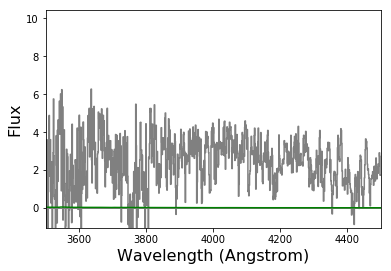

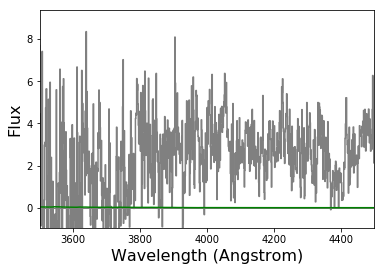

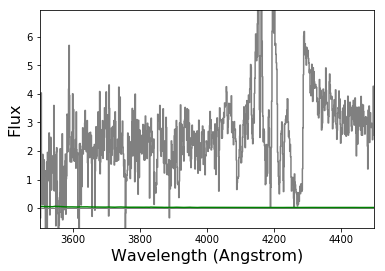

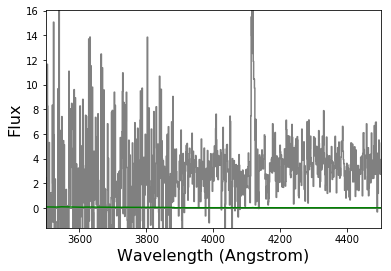

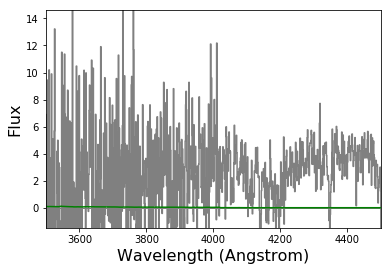

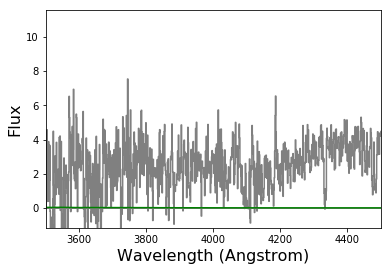

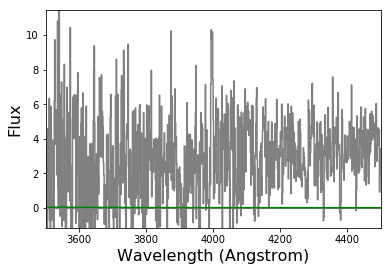

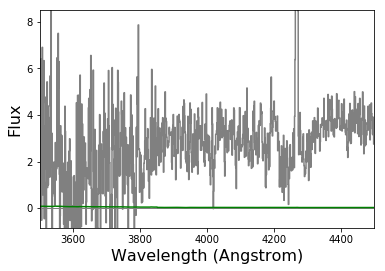

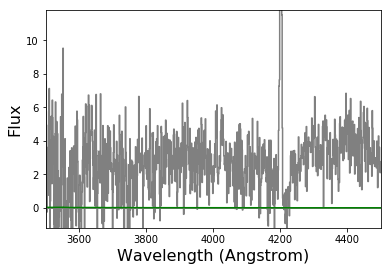

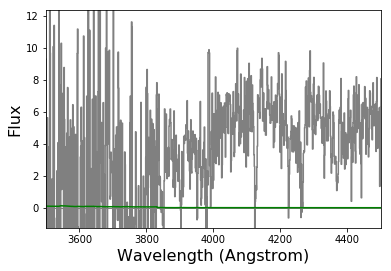

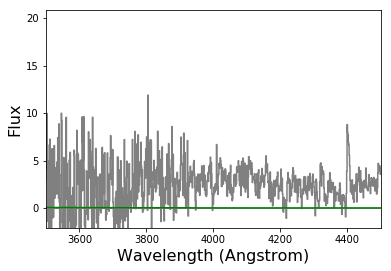

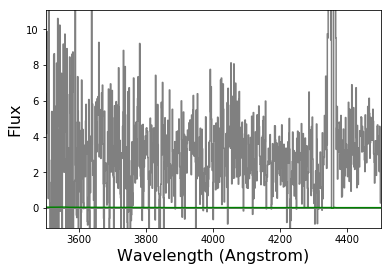

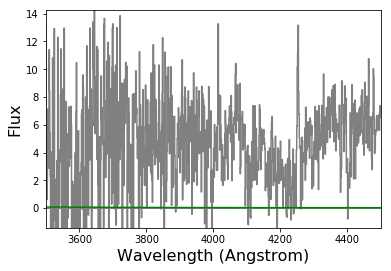

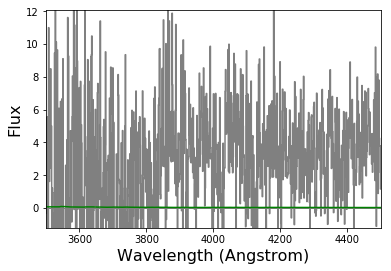

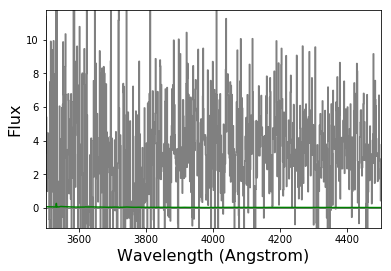

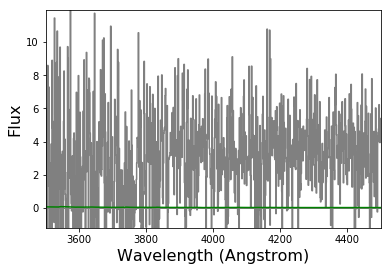

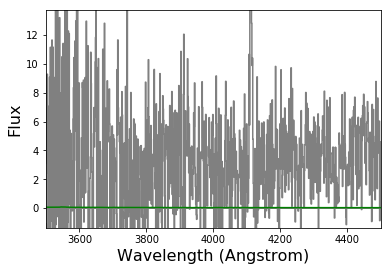

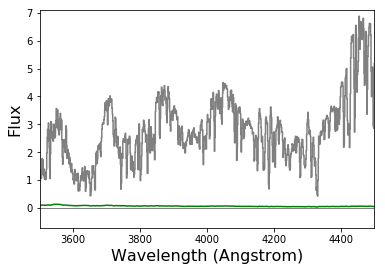

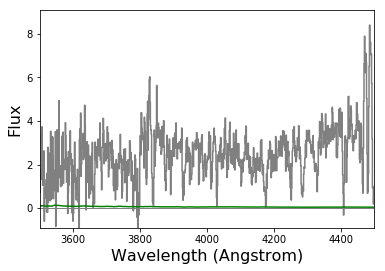

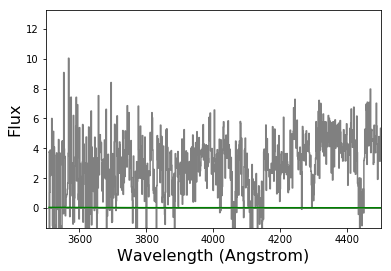

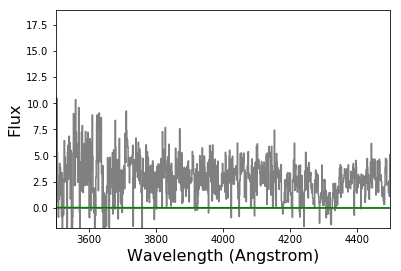

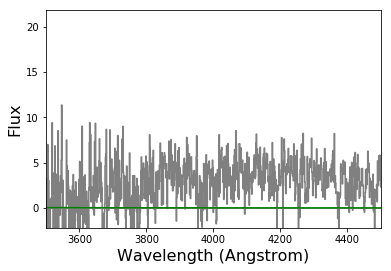

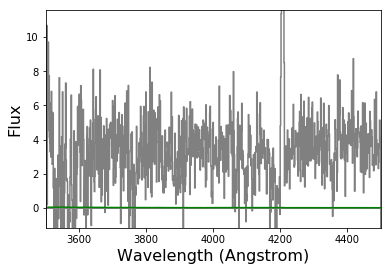

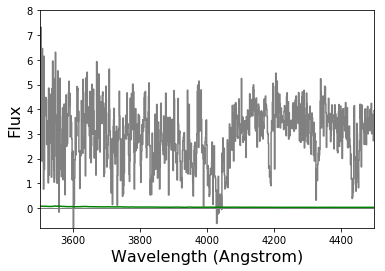

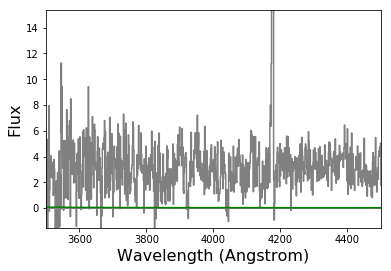

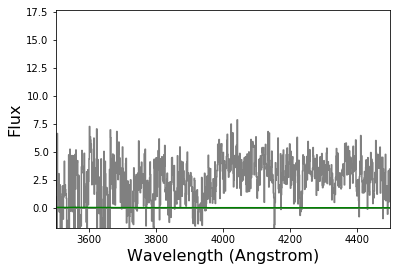

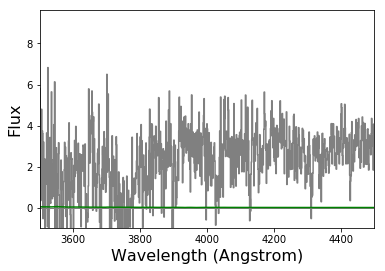

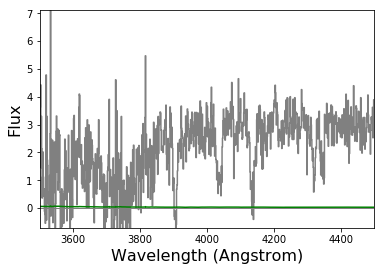

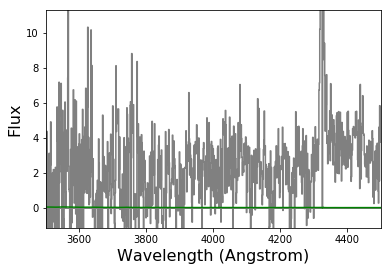

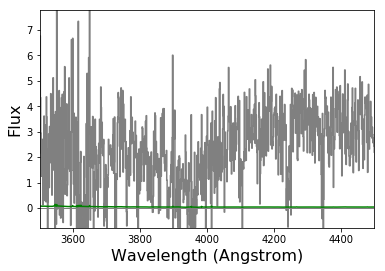

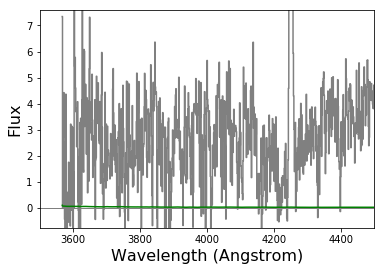

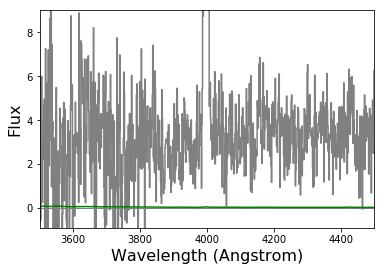

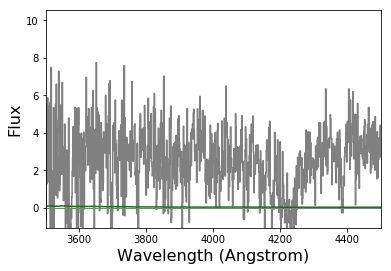

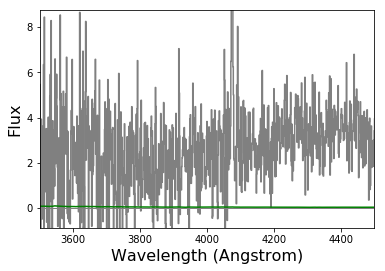

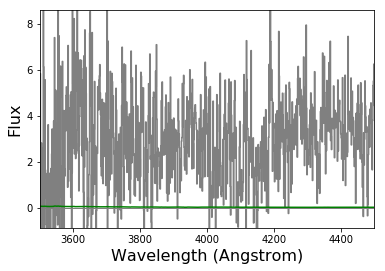

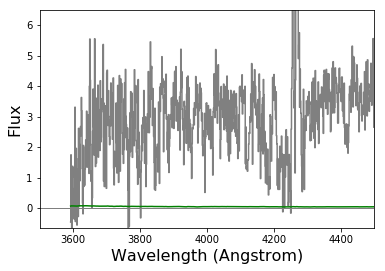

In [27]:
#waverange=(3500,4500)
#for j in scaled_spec:
    
#    j.plot(xlim=waverange)
#    plt.show()

In [28]:
new_spec = []

for i in range(len(scaled_spec)):       
    
    new_spec.append(XSpectrum1D(scaled_spec[i].data["wave"][0][640:1460],
                                scaled_spec[i].data["flux"][0][640:1460],
                                scaled_spec[i].data["sig"][0][640:1460]))


#scaled_spec[12].data["flux"][0][640:1460]

collate = ltsu.collate(new_spec)

len(trimmed_z)

/home/jsm/PycharmProjects/Summer_Research_2018/linetools/linetools/spectra/xspectrum1d.py:254: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


36

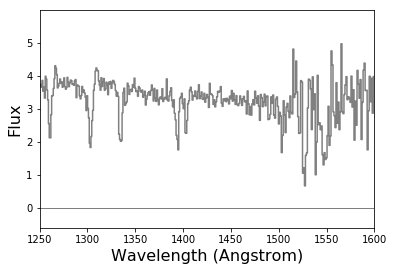

In [31]:
#rest frame wave values
rest_spec = ltsu.rebin_to_rest(collate,trimmed_z, 200000*u.m/u.s,grow_bad_sig = True)

#the stack!
stack = ltsu.smash_spectra(rest_spec)

stack.plot(xlim=(1250,1600))
plt.show()

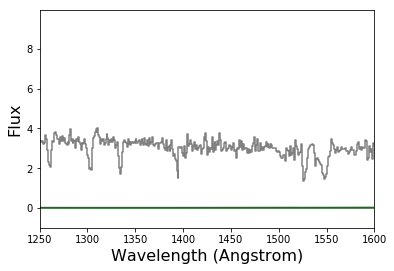

In [30]:
yeet = XSpectrum1D.from_file("/home/jsm/Downloads/fullstack.fits")

yeet.plot()

In [ ]:
stack.write_to_fits("fullstack36.fits")